# Navigation

---

This notebook demonstrates the use of Deep-Reinforcement-Learning in Unity environment.

In [1]:
from unityagents import UnityEnvironment
import numpy as np

import sys
sys.path.insert(0, '..') # enables the notebook to find the drl module

### 1. Configure the environment
Set the `UNITY_APP_HOME` to the directory containing Unity application with the agent environment. In this case we use Banana.app in `HOME` directory.

In [2]:
from os.path import expanduser
home = expanduser("~")
UNITY_APP_HOME = home + '/Banana.app'
print('UNITY_APP_HOME={}'.format(UNITY_APP_HOME))
env = UnityEnvironment(file_name=UNITY_APP_HOME)

UNITY_APP_HOME=/Users/roman.wiatr/Banana.app


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [3]:
brain_name = env.brain_names[0]
brain = env.brains[brain_name]
env_info = env.reset(train_mode=True)[brain_name]
action_size = brain.vector_action_space_size
state = env_info.vector_observations[0]
state_size = len(state)

### 2. Creating the agents
For this example we will create two agents. First one is going to be a random agent with metaparameters randomly selected from the metaparameter space returned by `meta_space`. This function can be used when exploring the metaparameter space. Second agent is created with predefined parameters.

In [4]:
%matplotlib inline
from drl.random_agent import RandomAgent
from drl.dqn_agent import DqnAgent, DqnAgentProperties, meta_space
from banana_env import EnvHelper
import random 

TRAIN_EPISODES = 400
TEST_EPISODES = 400
DEMO_EPISODES = 5

properties = meta_space({
    'lr':[5e-8, 5e-1],
    'fc_size':[16, 64],
    'gamma':[0.5, 0.99],
    'tau':[1e-8, 1e-1],
}, d=0.8)
agent_a = DqnAgent(state_size, action_size, 0, random.choice(list(properties)))
agent_b = DqnAgent(state_size, action_size, 0, DqnAgentProperties())

QNetwork(
  (fc1): Linear(in_features=37, out_features=20, bias=True)
  (fc2): Linear(in_features=20, out_features=20, bias=True)
  (fc3): Linear(in_features=20, out_features=4, bias=True)
)
QNetwork(
  (fc1): Linear(in_features=37, out_features=20, bias=True)
  (fc2): Linear(in_features=20, out_features=20, bias=True)
  (fc3): Linear(in_features=20, out_features=4, bias=True)
)
QNetwork(
  (fc1): Linear(in_features=37, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=4, bias=True)
)
QNetwork(
  (fc1): Linear(in_features=37, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=4, bias=True)
)


### 3. Training the agents
We will now train the agents using the EnvHelper from banana_env module. With `helper.set_agent(agent_a)` we set the randomly selected `agent_a` as the training agent and then we rum the `TRAIN_EPISODES` number of training episodes.
We do the same steps with `agent_b`.
While the agent is trained we monitor the best avarage score from the last 100 steps and each time the score improves we save the agent under `saved/agent_name`. `agent_name` is in fact the string representing the metaparameters of the agent.
After the agents are trained we plot the mean reward avareged over one hundred steps.

In [5]:
helper = EnvHelper(env, brain_name)

helper.set_agent(agent_a)
helper.run(episodes=TRAIN_EPISODES, train_mode=True, eps_step=1/100, eps_end=0.05)

helper.set_agent(agent_b)
helper.run(episodes=TRAIN_EPISODES, train_mode=True, eps_step=1/100, eps_end=0.05)

start with train_mode=True
Episode 400 ## Average Score: 0.21 ## Best Average Score: 1.33 ## Last Min Score: -3.00 ## Eps: 0.05 ## Score: 4.0 ## Done					
dqn_agent::buffer_size=100000;batch_size=64;gamma=0.99;tau=0.02557030935008929;lr=0.5;update_every=4;fc_size=23 Best Average Score 1.33
start with train_mode=True
Episode 400 ## Average Score: 14.79 ## Best Average Score: 14.68 ## Last Min Score: 6.00 ## Eps: 0.05 ## Score: 7.0 ## Done				
dqn_agent::buffer_size=100000;batch_size=64;gamma=0.99;tau=0.001;lr=0.0005;update_every=4;fc_size=64 Best Average Score 14.79


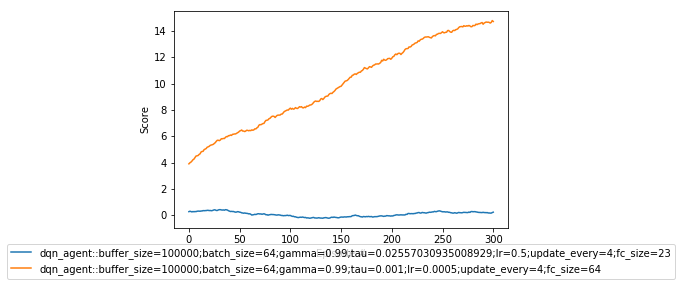

In [6]:
helper.show_plot(mode="average=100")

### 4. Testing the optimal agent
Now we load the optimal agent (saved under `saved\best`) and test it for `TEST_EPISODES` episodes. Then we plot all the agents together.

QNetwork(
  (fc1): Linear(in_features=37, out_features=37, bias=True)
  (fc2): Linear(in_features=37, out_features=37, bias=True)
  (fc3): Linear(in_features=37, out_features=4, bias=True)
)
QNetwork(
  (fc1): Linear(in_features=37, out_features=37, bias=True)
  (fc2): Linear(in_features=37, out_features=37, bias=True)
  (fc3): Linear(in_features=37, out_features=4, bias=True)
)
done loading
start with train_mode=False
Episode 400 ## Average Score: 15.62 ## Best Average Score: 16.23 ## Last Min Score: 0.00 ## Eps: 0.00 ## Score: 18.0 ## Done				
dqn_agent::buffer_size=100000;batch_size=64;gamma=0.99;tau=0.001;lr=0.0005;update_every=4;fc_size=37 Best Average Score 16.23


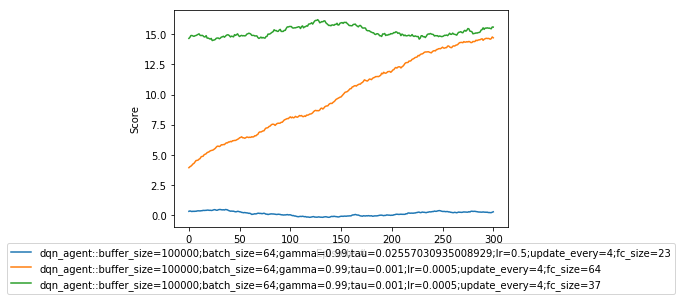

In [7]:
helper.set_agent(DqnAgent(state_size, action_size, 0, DqnAgentProperties(fc_size=37)))
helper.load('best')

helper.run(episodes=TEST_EPISODES, train_mode=False, eps_end=0)
helper.show_plot(mode="average=100")

QNetwork(
  (fc1): Linear(in_features=37, out_features=37, bias=True)
  (fc2): Linear(in_features=37, out_features=37, bias=True)
  (fc3): Linear(in_features=37, out_features=4, bias=True)
)
QNetwork(
  (fc1): Linear(in_features=37, out_features=37, bias=True)
  (fc2): Linear(in_features=37, out_features=37, bias=True)
  (fc3): Linear(in_features=37, out_features=4, bias=True)
)
start with train_mode=True
Episode 300 ## Average Score: 12.97 ## Best Average Score: 12.93 ## Last Min Score: 0.00 ## Eps: 0.05 ## Score: 13.0 ## Done			
A Best Average Score 12.97
QNetwork(
  (fc1): Linear(in_features=37, out_features=37, bias=True)
  (fc2): Linear(in_features=37, out_features=37, bias=True)
  (fc3): Linear(in_features=37, out_features=4, bias=True)
)
QNetwork(
  (fc1): Linear(in_features=37, out_features=37, bias=True)
  (fc2): Linear(in_features=37, out_features=37, bias=True)
  (fc3): Linear(in_features=37, out_features=4, bias=True)
)
start with train_mode=True
Episode 300 ## Average Scor

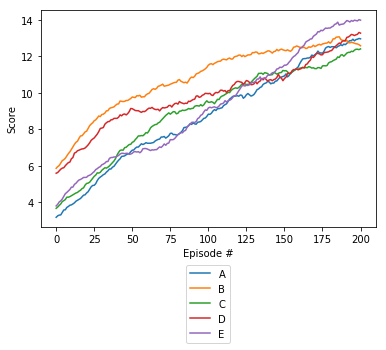

In [5]:
helper2 = EnvHelper(env, brain_name)

helper2.set_agent(DqnAgent(state_size, action_size, 0, DqnAgentProperties(fc_size=37)), name="A")
helper2.run(episodes=300, train_mode=True, eps_step=1/100, eps_end=0.05)

helper2.set_agent(DqnAgent(state_size, action_size, 0, DqnAgentProperties(fc_size=37)), name="B")
helper2.run(episodes=300, train_mode=True, eps_step=1/20, eps_end=0.05)

helper2.set_agent(DqnAgent(state_size, action_size, 0, DqnAgentProperties(fc_size=37)), name="C")
helper2.run(episodes=300, train_mode=True, eps_step=1/100, eps_end=0.01)

helper2.set_agent(DqnAgent(state_size, action_size, 0, DqnAgentProperties(fc_size=37)), name="D")
helper2.run(episodes=300, train_mode=True, eps_step=1/20, eps_end=0.01)

helper2.set_agent(DqnAgent(state_size, action_size, 0, DqnAgentProperties(fc_size=37)), name="E")
helper2.run(episodes=300, train_mode=True, eps_step=1, eps_end=0.01)

helper2.show_plot(mode="average=100")

QNetwork(
  (fc1): Linear(in_features=37, out_features=37, bias=True)
  (fc2): Linear(in_features=37, out_features=37, bias=True)
  (fc3): Linear(in_features=37, out_features=4, bias=True)
)
QNetwork(
  (fc1): Linear(in_features=37, out_features=37, bias=True)
  (fc2): Linear(in_features=37, out_features=37, bias=True)
  (fc3): Linear(in_features=37, out_features=4, bias=True)
)
start with train_mode=True
Episode 300 ## Average Score: 12.53 ## Best Average Score: 12.52 ## Last Min Score: 2.00 ## Eps: 0.05 ## Score: 19.0 ## Done			
agent_low_eps Best Average Score 12.53


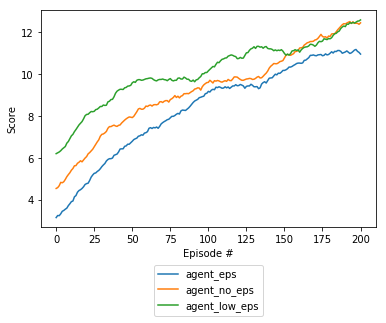

QNetwork(
  (fc1): Linear(in_features=37, out_features=37, bias=True)
  (fc2): Linear(in_features=37, out_features=37, bias=True)
  (fc3): Linear(in_features=37, out_features=4, bias=True)
)
QNetwork(
  (fc1): Linear(in_features=37, out_features=37, bias=True)
  (fc2): Linear(in_features=37, out_features=37, bias=True)
  (fc3): Linear(in_features=37, out_features=4, bias=True)
)
start with train_mode=True
Episode 300 ## Average Score: 14.20 ## Best Average Score: 14.33 ## Last Min Score: 1.00 ## Eps: 0.01 ## Score: 22.0 ## Done			
D Best Average Score 14.33


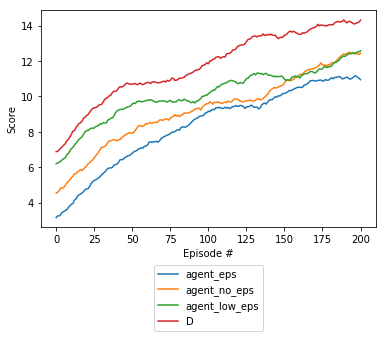

In [7]:
helper2.set_agent(DqnAgent(state_size, action_size, 0, DqnAgentProperties(fc_size=37)), name="D")
helper2.run(episodes=300, train_mode=True, eps_step=1/20, eps_end=0.01)

helper2.show_plot(mode="average=100")